In [60]:
import pandas as pd
data=pd.read_csv("C:\\Users\\ACER\\Downloads\\IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [61]:
data.shape

(50000, 2)

In [62]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


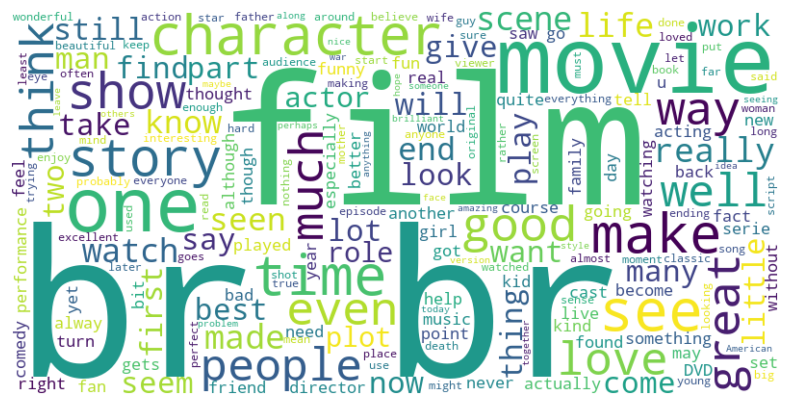

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data[data['sentiment'] == 'positive']['review']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


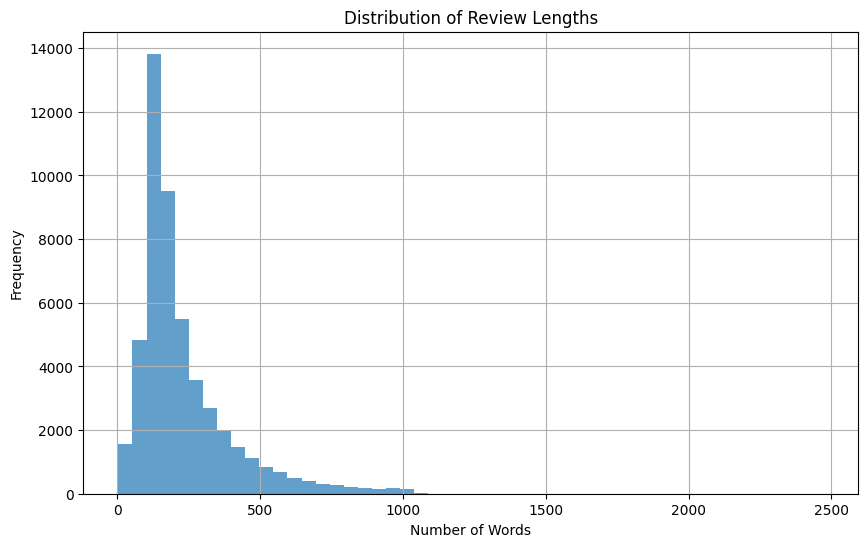

In [69]:
data['review_length'] = data['review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
data['review_length'].hist(bins=50, alpha=0.7)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


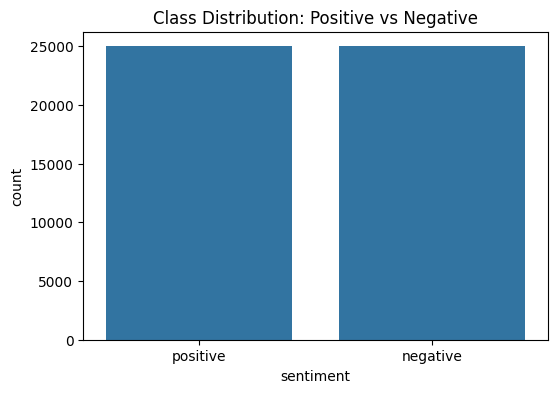

In [70]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=data)
plt.title('Class Distribution: Positive vs Negative')
plt.show()


In [71]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [72]:
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_13428\2568826810.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)


In [73]:
data.head()

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [74]:
# split data into training data and test data

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [75]:
print(train_data.shape)
print(test_data.shape)

(40000, 3)
(10000, 3)


**Data Preprocessing**

In [76]:
# Tokenize text data

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [77]:
print(x_train)

[[1935    1 1200 ...  205  351 3856]
 [   3 1651  595 ...   89  103    9]
 [   0    0    0 ...    2  710   62]
 ...
 [   0    0    0 ... 1641    2  603]
 [   0    0    0 ...  245  103  125]
 [   0    0    0 ...   70   73 2062]]


In [78]:
print(x_test)

[[   0    0    0 ...  995  719  155]
 [  12  162   59 ...  380    7    7]
 [   0    0    0 ...   50 1088   96]
 ...
 [   0    0    0 ...  125  200 3241]
 [   0    0    0 ... 1066    1 2305]
 [   0    0    0 ...    1  332   27]]


In [79]:
y_train = train_data["sentiment"]
y_test = test_data["sentiment"]

In [80]:
print(y_train)

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64


**LSTM - Long Short-Term Memory**

In [81]:
# build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [82]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [83]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Build the model
model = Sequential()

# Add an Embedding layer with input_dim=5000, output_dim=128, input_length=200
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))

# Build the model with a dummy input to infer the shapes
model.build(input_shape=(None, 200))

# Check the output shape after building
print(f"Embedding layer output shape: {model.output_shape}")

# Add an LSTM layer with 128 units, and dropout for regularization
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# Add a Dense layer with 1 output unit (sigmoid for binary classification)
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Model summary:")
model.summary()


Embedding layer output shape: (None, 200, 128)
Model summary:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 200, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 771,713 (2.94 MB)

 Trainable params: 771,713 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

**Training the Model**

In [108]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 123s 245ms/step - accuracy: 0.9010 - loss: 0.2521 - val_accuracy: 0.8752 - val_loss: 0.3225
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 109s 218ms/step - accuracy: 0.9263 - loss: 0.1928 - val_accuracy: 0.8824 - val_loss: 0.3121
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 136s 271ms/step - accuracy: 0.9403 - loss: 0.1617 - val_accuracy: 0.8823 - val_loss: 0.3094
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 134s 268ms/step - accuracy: 0.9485 - loss: 0.1407 - val_accuracy: 0.8770 - val_loss: 0.3516
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 139s 278ms/step - accuracy: 0.9581 - loss: 0.1151 - val_accuracy: 0.8733 - val_loss: 0.3815


**Model Evaluation**

In [109]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.8758 - loss: 0.3715
Test Loss: 0.3668529689311981
Test Accuracy: 0.8781999945640564


313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.8758 - loss: 0.3715


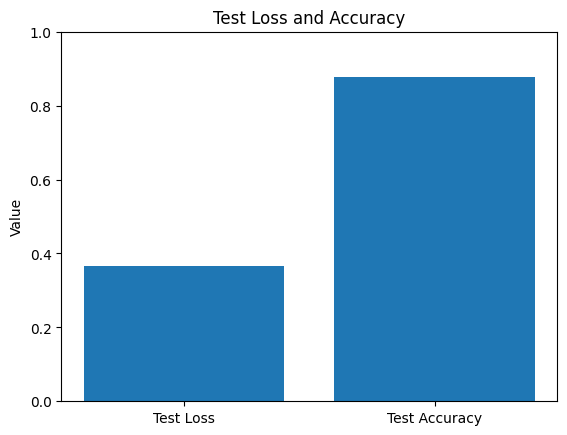

In [110]:
import matplotlib.pyplot as plt
loss, accuracy = model.evaluate(x_test, y_test)
metrics = ['Test Loss', 'Test Accuracy']
values = [loss, accuracy]
plt.bar(metrics, values,)
plt.title("Test Loss and Accuracy")
plt.ylabel("Value")
plt.ylim(0, 1)
plt.show()

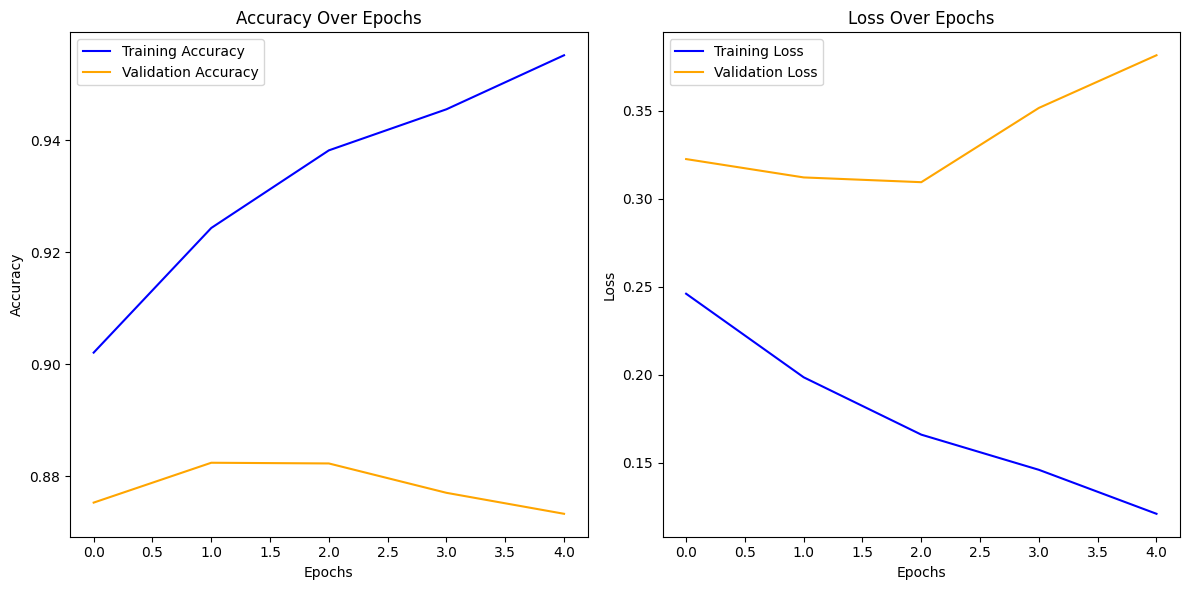

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot (Training and Validation loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Adjust the layout to ensure plots don't overlap
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step


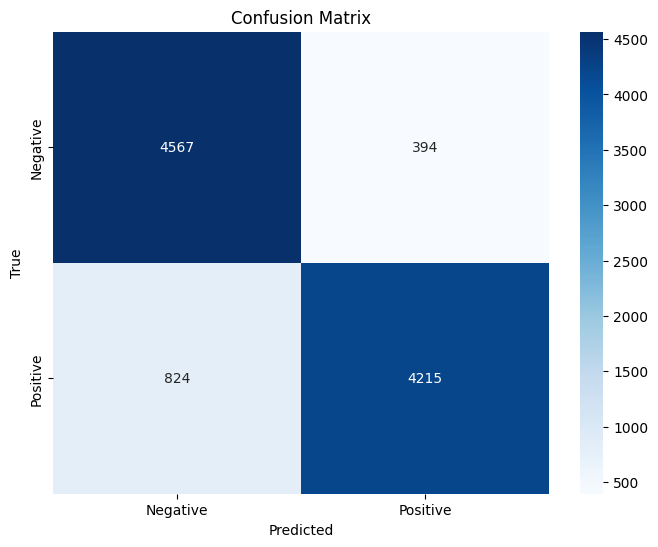

In [112]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test contains the true labels and y_pred are the model's predictions
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)          # For binary classification

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


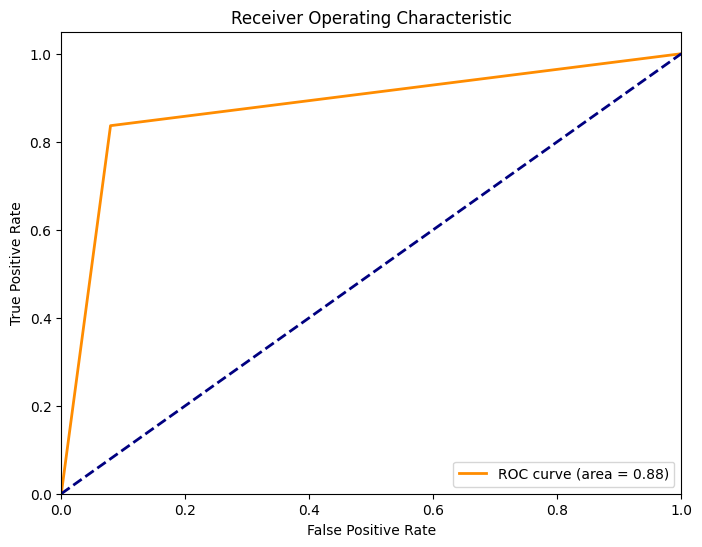

In [113]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**Building a Predictive System**

In [114]:
def predict_sentiment(review):
  # tokenize and pad the review
  sequence = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequence, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

In [115]:
new_review = "This movie was fantastic. I loved it."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
The sentiment of the review is: positive


In [116]:
new_review = "the move was not good."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The sentiment of the review is: negative


In [117]:
new_review ="i loved this movie. you have to respect midgets that dressed up like tiny Martians. Sure the story may have been thin at times, but you can't take away from the way it was done. i used to watch this over and over again "
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
The sentiment of the review is: positive


In [121]:

model.save('_trained_model.h5') 

In [ ]:
# # Load model from file
# model = tf.keras.models.load_model('model.h5')
